# Yolo V8 + SAM

We will see how to identify an object from an image using `Yolo`, then segmant that object using `SAM` and finally removing the background.

#### Install the required dependencies

In [ ]:
!pip install ultralytics

!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# The Ultralytics library provides implementations for various computer vision tasks, including object detection using YOLO (You Only Look Once) models. YOLO is a popular object detection algorithm known for its speed and accuracy.

# The "SAM" model you mentioned likely refers to the "Segment-Anything-Models" repository, which contains models trained for various segmentation tasks. Specifically, "SAM-ViT-H" could refer to a vision transformer model trained for semantic segmentation tasks.

# Combining YOLO with SAM-ViT-H could mean leveraging the strengths of both models for object detection and segmentation tasks. This could lead to improved performance and accuracy in tasks where both object detection and segmentation are needed.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

#### Import the things we need

In [ ]:
import ultralytics
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from IPython.display import display, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/107.7 GB disk)


In [ ]:
# 1. import ultralytics: provides implementations for various computer vision tasks, including object detection using YOLO models.
# This imports the YOLO class from the Ultralytics library.

# 2. YOLO (You Only Look Once) is an object detection algorithm that can detect multiple objects in an image and
# classify them into predefined categories.


# 3. from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor: This imports specific components from the Segment Anything repository.
# Here's what each of these components does:

# 3a. sam_model_registry: This likely imports a registry of available models from the Segment Anything repository.
# Its like telling what are the toys available in factory


# 3b. SamAutomaticMaskGenerator: This likely imports a class or function related to generating automatic masks for segmentation tasks.
# Using stencil to paint the specific parts of toy automatically with different colors or patterns


# 3c. SamPredictor: This likely imports a class or function related to making predictions using models from the Segment Anything repository.
# predicts how well a toy will perform based on its design and features.
# It looks at things like the shape, size, and materials used to make the toy, and then guesses how popular or successful it might be once it's out in the world.

# 4. from IPython.display import display, Image: This imports the display and Image classes from IPython.display module. These are used to display images within an IPython environment.

# 5. import cv2: This imports the OpenCV library, which is commonly used for image processing tasks such as reading, writing, and manipulating images.

# 6. ultralytics.checks(): This likely calls a function named checks() from the Ultralytics library. Without further context, it's unclear what this function does specifically, but it could be performing some checks or initializations related to the Ultralytics library.

#### Detect object using Yolo V8n

In [ ]:
!yolo predict model=yolov8n.pt source='/content/rail.jpg'

# !yolo predict: This is the main command telling the system to use the YOLO object detection model to make predictions.
# model=yolov8n.pt: This specifies the model to be used for making predictions. In this case, it's referring to a YOLOv8 model, specifically the one named "yolov8n.pt".

Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/rail.jpg: 544x640 1 train, 298.3ms
Speed: 16.2ms preprocess, 298.3ms inference, 1759.1ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#### See the image

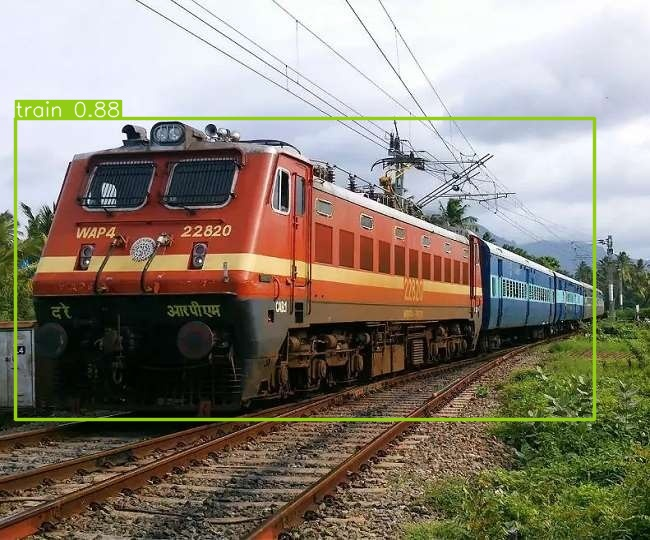

In [ ]:
Image(filename='/content/runs/detect/predict/rail.jpg', height=800)

In [ ]:
model = YOLO('/content/yolov8n.pt')
results = model.predict(source='/content/rail.jpg', conf=0.25)

# Objects with confidence or threshold greater than or equal to 0.25 will be included for object detection and stored in results


image 1/1 /content/rail.jpg: 544x640 1 train, 246.1ms
Speed: 7.6ms preprocess, 246.1ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
for result in results:
    boxes = result.boxes

bbox=boxes.xyxy.tolist()[0] # bounding box coordinates to list

bbox  # coordinates of top left corner - xmin,ymin and coordinates of bottom right corner - xmax,ymax

[15.241069793701172, 118.36302185058594, 594.9931030273438, 419.1826171875]

In [ ]:
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [ ]:
# The checkpoint file path (sam_checkpoint) ensures that the model is initialized with the correct weights and configurations.
# By specifying the model type (vit_h), the code selects a specific segmentation model architecture from the registry.
# The SamPredictor object (predictor) is then created, allowing for easy prediction using the initialized segmentation model.

In [ ]:
image = cv2.cvtColor(cv2.imread('/content/rail.jpg'), cv2.COLOR_BGR2RGB)
# cv2.imread('/content/rail.jpg'): This function call reads the image file located at the path '/content/rail.jpg' using OpenCV's imread function.
# This function returns a NumPy array representing the image in the BGR (Blue, Green, Red) color format.
# cv2.cvtColor(..., cv2.COLOR_BGR2RGB) - converting BGR to RGB format
predictor.set_image(image)
# segmentation is done using segmentation model and its configurations and also processes for next segmentation tasks

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# This function takes a segmentation mask (mask) and visualizes it on the specified Matplotlib axis (ax).
# If random_color is True, it generates a random color for the mask; otherwise, it uses a default color.
# The mask is multiplied element-wise with the color array to generate a colored mask image, which is then displayed on the axis.

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

# This function visualizes points on the specified Matplotlib axis (ax).
# It differentiates between positive and negative points based on the provided labels (labels) and displays them using different marker colors.
# The size of the markers can be adjusted using the marker_size parameter.

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# This function visualizes a bounding box (box) on the specified Matplotlib axis (ax).
# It extracts the coordinates and dimensions of the bounding box and adds a rectangle patch to the axis with the specified edge color and linewidth.



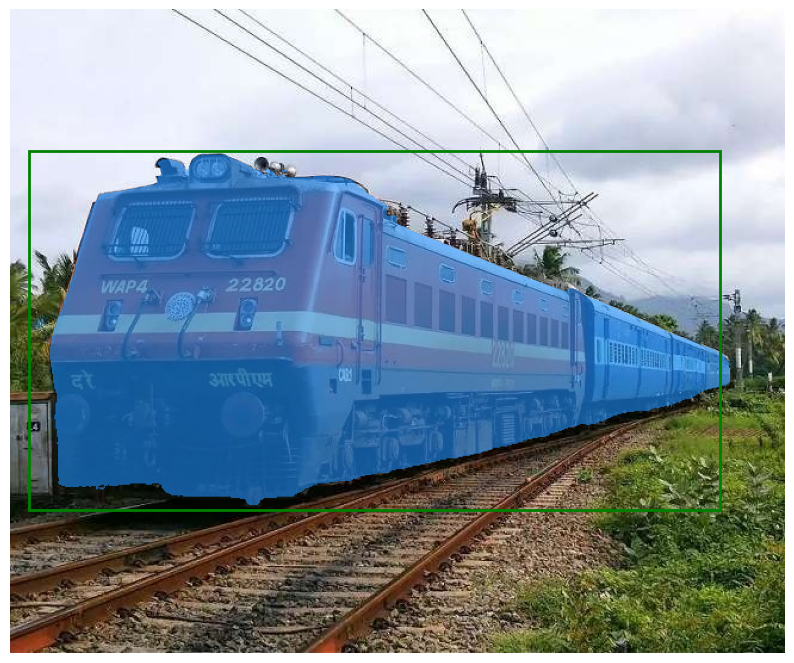

In [ ]:
input_box = np.array(bbox)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
# bbox likely contains the coordinates of the bounding box of an object detected in the image.
# This line invokes the predict method of the predictor object to perform segmentation on the specified bounding box region.
# The method takes several parameters:
# point_coords=None: Coordinates of points (not used in this case).
# point_labels=None: Labels corresponding to the points (not used in this case).
# box=input_box[None, :]: The bounding box region specified as input_box. The [None, :] syntax is used to convert the 1D array input_box into a 2D array with a single row.
# multimask_output=False: A flag indicating whether to output multiple masks. In this case, it's set to False, indicating that only one mask will be generated.
# plt.figure(figsize=(10, 10)):

# This line creates a new Matplotlib figure with a specified size.
# plt.imshow(image):

# This line displays the original image on the Matplotlib axis.
# show_mask(masks[0], plt.gca()):

# This line invokes the show_mask function to visualize the segmentation mask (masks[0]) on the current Matplotlib axis.
# plt.gca() returns the current Matplotlib axis.
# show_box(input_box, plt.gca()):

# This line invokes the show_box function to visualize the bounding box (input_box) on the current Matplotlib axis.
# plt.axis('off'):

# This line turns off the axis labels and ticks.
# plt.show():

# This line displays the Matplotlib figure containing the original image, segmentation mask, and bounding box.

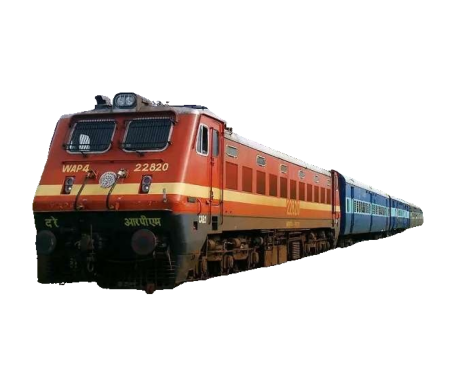

In [ ]:
segmentation_mask = masks[0]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 255

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()


image 1/1 /content/leaf.jpg: 512x640 1 umbrella, 766.1ms
Speed: 9.1ms preprocess, 766.1ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


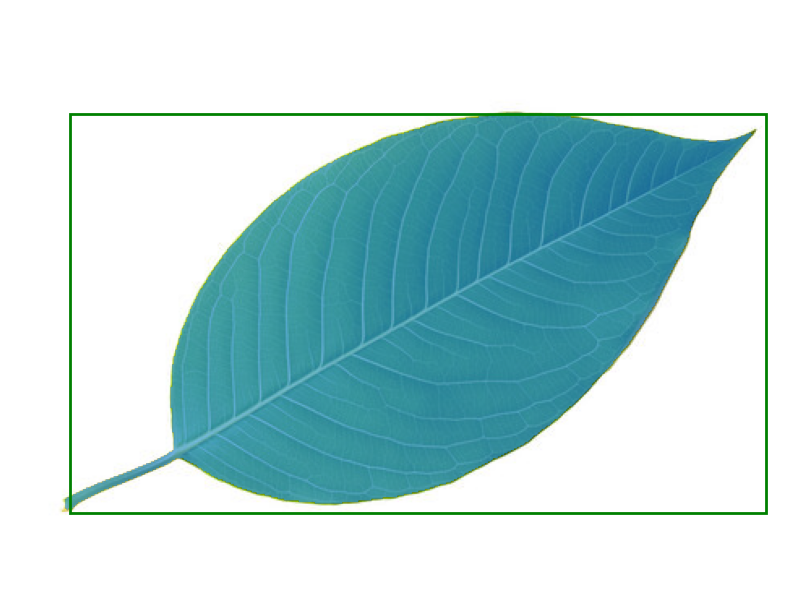

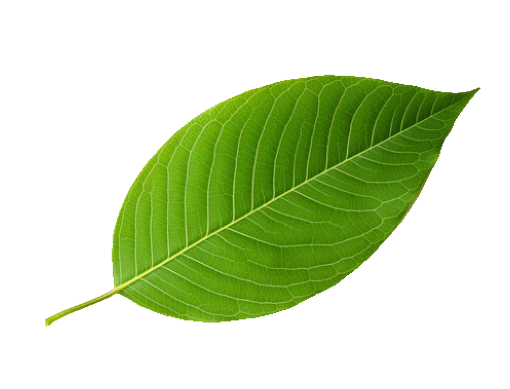

In [ ]:
image_path = '/content/leaf.jpg'

results = model.predict(source=image_path, conf=0.25)

for result in results:
    boxes = result.boxes

bbox=boxes.xyxy.tolist()[0]

image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

predictor.set_image(image)

input_box = np.array(bbox)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

segmentation_mask = masks[0]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 255

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()